<a href="https://colab.research.google.com/github/kdmwangi/Data-Science/blob/main/C6_M4_Case_NaiveBayes_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes Classification
> Documentation: https://scikit-learn.org/stable/modules/naive_bayes.html

## Setup

### Environment

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

### Load the dataset iris

In [27]:
iris = datasets.load_iris()

In [28]:
df = pd.DataFrame({'Sepal length': iris.data[:,0],
                   'Sepal width': iris.data[:,1],
                   'Petal length':iris.data[:,2],
                   'Petal width':iris.data[:,3],
                   'Species':iris.target})
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [49]:
df = df[df['Species'] != 1]

### A simple visualization

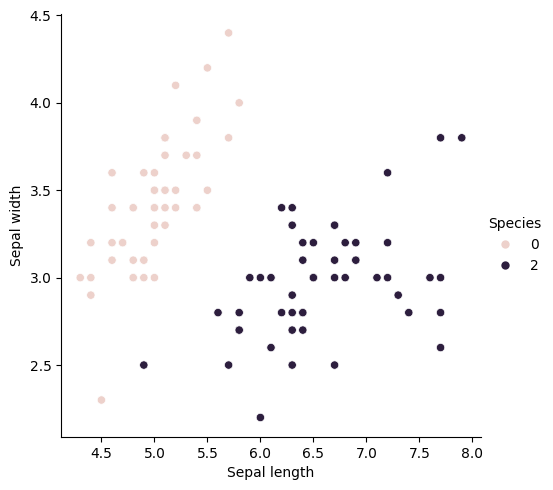

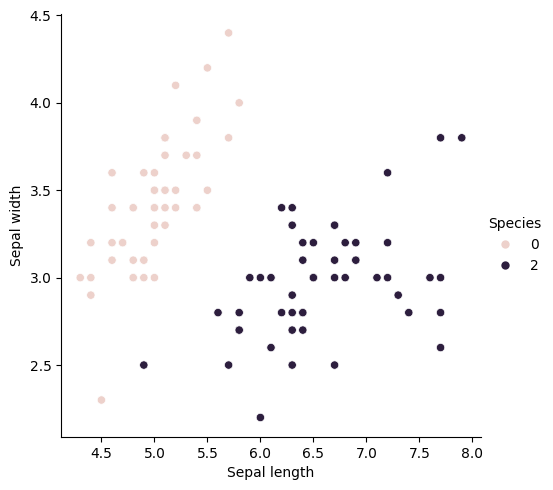

In [42]:
sns.relplot(data = df, x = 'Sepal length', y = 'Sepal width', hue = 'Species')

### Train-Test Split

In [43]:
from sklearn.model_selection import train_test_split

X = df[df.columns[:4]]
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [50]:
X_train[:5]

,Sepal length,Sepal width,Petal length,Petal width
101,5.8,2.7,5.1,1.9
136,6.3,3.4,5.6,2.4
30,4.8,3.1,1.6,0.2
115,6.4,3.2,5.3,2.3
144,6.7,3.3,5.7,2.5


## Train the model

In [51]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [52]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[11  0]
 [ 0  9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Accuracy: 1.0
